In [1]:
import pandas as pd
import numpy as np

#Data Preparation

In [2]:
CCMIX=pd.read_csv("/content/10min_CCMIX.csv")

In [3]:
BTG=pd.read_csv('/content/Bitcoin Gold_13_12_2017-12_02_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
EMC2=pd.read_csv('/content/Einsteinium_14_10_2017-13_12_2017_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
ELC=pd.read_csv('/content/Electroneum_13_12_2017-12_02_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
ETC=pd.read_csv('/content/Ethereum Classic_13_12_2017-12_02_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
EXP=pd.read_csv('/content/Expanse_14_10_2017-13_12_2017_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
FTC=pd.read_csv('/content/Feathercoin_05_04_2013-04_06_2013_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
XZC=pd.read_csv('/content/Firo_13_12_2017-12_02_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
ZEN=pd.read_csv('/content/Horizen_14_10_2017-13_12_2017_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
KRB=pd.read_csv('/content/Karbo_13_12_2017-12_02_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
LTC=pd.read_csv('/content/Litecoin_13_12_2017-12_02_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
MNC=pd.read_csv('/content/MonaCoin_14_10_2017-13_12_2017_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
PGC=pd.read_csv('/content/Pigeoncoin_10_06_2018-09_08_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
PIN=pd.read_csv('/content/Public Index Network_13_12_2017-12_02_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
TRC=pd.read_csv('/content/Terracoin_30_03_2013-29_05_2013_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
XVG=pd.read_csv('/content/Verge_13_12_2017-12_02_2018_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]
VTC=pd.read_csv('/content/Vertcoin_01_01_2018-31_12_2021_historical_data_coinmarketcap.csv',sep=';').iloc[::-1]


In [4]:
def mean_marketCap(data):
  return data['marketCap'].mean()

In [5]:
#Compare the size of the cryptocurrencies
Mean_marketCaps={mean_marketCap(BTG):'BTG',mean_marketCap(EMC2):'EMC2',mean_marketCap(ELC):'ELC',mean_marketCap(ETC):'ETC',mean_marketCap(EXP):'EXP',mean_marketCap(FTC):'FTC',mean_marketCap(XZC):'XZC',mean_marketCap(ZEN):'ZEN',mean_marketCap(KRB):'KRB',mean_marketCap(LTC):'LTC',mean_marketCap(MNC):'MNC',mean_marketCap(PGC):'PGC',mean_marketCap(PIN):'PIN',mean_marketCap(TRC):'TRC',mean_marketCap(XVG):'XVG',mean_marketCap(TRC):'TRC'}


In [6]:
Mean_marketCaps

{643816871.30342: 'BTG',
 31689280.132606532: 'EMC2',
 138958265.0279302: 'ELC',
 2088397823.7285008: 'ETC',
 4803761.523234091: 'EXP',
 2366388.406864717: 'FTC',
 81798080.70085336: 'XZC',
 250073270.63614625: 'ZEN',
 1335188.4669964206: 'KRB',
 6723527814.459584: 'LTC',
 129204737.0432376: 'MNC',
 1349213.0333911262: 'PGC',
 7991713.860023177: 'PIN',
 751999.5550759799: 'TRC',
 318072857.97973955: 'XVG'}

In [7]:
sorted(Mean_marketCaps.items())

[(751999.5550759799, 'TRC'),
 (1335188.4669964206, 'KRB'),
 (1349213.0333911262, 'PGC'),
 (2366388.406864717, 'FTC'),
 (4803761.523234091, 'EXP'),
 (7991713.860023177, 'PIN'),
 (31689280.132606532, 'EMC2'),
 (81798080.70085336, 'XZC'),
 (129204737.0432376, 'MNC'),
 (138958265.0279302, 'ELC'),
 (250073270.63614625, 'ZEN'),
 (318072857.97973955, 'XVG'),
 (643816871.30342, 'BTG'),
 (2088397823.7285008, 'ETC'),
 (6723527814.459584, 'LTC')]

In [8]:
from datetime import datetime
def data_preparation(data):
  data.drop(['timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low', 'timestamp'],axis=1,inplace=True)
  data.rename(columns={'timeOpen':'time'},inplace=True)
  data.set_index('time', inplace=True)
  data.index = pd.to_datetime(data.index)

In [9]:
data_preparation(BTG)
data_preparation(EMC2)
data_preparation(ELC)
data_preparation(ETC)
data_preparation(EXP)
data_preparation(FTC)
data_preparation(XZC)
data_preparation(ZEN)
data_preparation(KRB)
data_preparation(LTC)
data_preparation(MNC)
data_preparation(PGC)
data_preparation(PIN)
data_preparation(TRC)
data_preparation(XVG)
data_preparation(VTC)

In [10]:
CCMIX.set_index('time', inplace=True)
CCMIX.index = pd.to_datetime(CCMIX.index)

In [11]:
def calculate_returns(df,close_col,return_col='returns'):
  df['log_p_for_'+return_col]=np.log(df[close_col])
  df[return_col] = df['log_p_for_'+return_col].diff()

In [12]:
def redefine_returns(data):
  data['returns']=np.exp(data['returns'])-1
  data['Rmkt']=np.exp(data['Rmkt'])-1

In [13]:
calculate_returns(BTG,'close','returns')
calculate_returns(EMC2,'close','returns')
calculate_returns(ELC,'close','returns')
calculate_returns(ETC,'close','returns')
calculate_returns(EXP,'close','returns')
calculate_returns(XZC,'close','returns')
calculate_returns(ZEN,'close','returns')
calculate_returns(KRB,'close','returns')
calculate_returns(LTC,'close','returns')
calculate_returns(MNC,'close','returns')
calculate_returns(PIN,'close','returns')
calculate_returns(XVG,'close','returns')
calculate_returns(CCMIX,'CCMIX','Rmkt')

In [14]:
#localization of the datetime index of CCMIX dataframe to UTC to match that of the other dataframe with which it would be merged
CCMIX.index = CCMIX.index.tz_localize('UTC')

In [15]:
#merging each cryptocurrency dataframe with he CCMIX dataframe to be able to define
#the market index correspnding the relevent dates associated the currencies dataframes
BTGm = pd.merge(BTG, CCMIX, left_index=True, right_index=True)
EMC2m = pd.merge(EMC2, CCMIX, left_index=True, right_index=True)
ELCm = pd.merge(ELC, CCMIX, left_index=True, right_index=True)
ETCm = pd.merge(ETC, CCMIX, left_index=True, right_index=True)
EXPm = pd.merge(EXP, CCMIX, left_index=True, right_index=True)
FTCm = pd.merge(FTC, CCMIX, left_index=True, right_index=True)
XZCm = pd.merge(XZC, CCMIX, left_index=True, right_index=True)
ZENm = pd.merge(ZEN, CCMIX, left_index=True, right_index=True)
KRBm = pd.merge(KRB, CCMIX, left_index=True, right_index=True)
LTCm = pd.merge(LTC, CCMIX, left_index=True, right_index=True)
MNCm = pd.merge(MNC, CCMIX, left_index=True, right_index=True)
PGCm = pd.merge(PGC, CCMIX, left_index=True, right_index=True)
PINm = pd.merge(PIN, CCMIX, left_index=True, right_index=True)
TRCm = pd.merge(TRC, CCMIX, left_index=True, right_index=True)
XVGm = pd.merge(XVG, CCMIX, left_index=True, right_index=True)
VTCm = pd.merge(VTC, CCMIX, left_index=True, right_index=True)

In [16]:
BTGm.to_csv("10min_BTG_cmk.csv")
EMC2m.to_csv("10min_ECM2_cmk.csv")
ELCm.to_csv("10min_ELC_cmk.csv")
ETCm.to_csv("10min_ETC_cmk.csv")
EXPm.to_csv("10min_EXP_cmk.csv")
FTCm.to_csv("10min_FTC_cmk.csv")
XZCm.to_csv("10min_XZC_cmk.csv")
ZENm.to_csv("10min_ZEN_cmk.csv")
LTCm.to_csv("10min_LTC_cmk.csv")
KRBm.to_csv("10min_KRB_cmk.csv")
MNCm.to_csv("10min_MNC_cmk.csv")
PGCm.to_csv("10min_PGC_cmk.csv")
PINm.to_csv("10min_PIN_cmk.csv")
TRCm.to_csv("10min_TRC_cmk.csv")
XVGm.to_csv("10min_XVG_cmk.csv")
VTCm.to_csv("10min_VTC_cmk.csv")

In [17]:

# redefine_returns(BTGm)
# redefine_returns(EMC2m)
# redefine_returns(ELCm)
# redefine_returns(ETCm)
# redefine_returns(EXPm)
# redefine_returns(FTCm)
# redefine_returns(XZCm)
# redefine_returns(ZENm)
# redefine_returns(KRBm)
# redefine_returns(LTCm)
# redefine_returns(MNCm)
# redefine_returns(PGCm)
# redefine_returns(PINm)
# redefine_returns(TRCm)
# redefine_returns(XVGm)
# redefine_returns(VTCm)

In [18]:
BTG_attack_dates=['2018-05-16 22:37:54','2020-01-23 18:01:32']
EMC2_attack_dates=['2019-01-06 12:00:00']
ELC_attack_dates=['2018-04-04 12:00:00']
ETC_attack_dates=['2019-01-04 03:27:11','2020-07-31 16:36:07','2020-08-06 02:54:27','2020-08-29 00:00:00']
EXP_attack_dates=['2019-07-29 12:00:00']
XZC_attack_dates=['2021-01-19 17:24:20']
ZEN_attack_dates=['2018-06-03 00:26:00']
KRB_attack_dates=['2018-10-11 12:00:00']
LTC_attack_dates=['2018-05-30 12:00:00','2019-06-04 12:00:00']
MNC_attack_dates=['2018-04-08 12:00:00','2018-05-15 12:00:00']
PIN_attack_dates=['2018-09-08 12:00:00']
XVG_attack_dates=['2018-04-04 06:00:00','2018-05-22 00:37:00']

In [19]:
crypto_sets=[ [BTGm,BTG_attack_dates,"Bitoin Gold"],
              [EMC2m,EMC2_attack_dates,"Einshteinium"],
              [ELCm,ELC_attack_dates,"Electroneum"],
              [ETCm,ETC_attack_dates,"Ethereum Classic"],
              [EXPm,EXP_attack_dates,"Expance"],
              [XZCm,XZC_attack_dates,"Zcoin(Firo)"],
              [ZENm,ZEN_attack_dates,"Zencoin(Horizon)"],
              [KRBm,KRB_attack_dates,"Karbo"],
              [LTCm,LTC_attack_dates,"Litecoin"],
              [MNCm,MNC_attack_dates,"Monacoin"],
              [PINm,PIN_attack_dates,"Public Index Network"],
              [XVGm,XVG_attack_dates,"Verge"],
            ]

#Discriptive statistics

In [20]:
from scipy.stats import kurtosis, skew, trim_mean
dfs =[crypto[0] for crypto in crypto_sets]
# Create a DataFrame
combined_returns = pd.concat([df['returns'] for df in dfs], axis=0)

# Calculate basic descriptive statistics
total_unique_prices = len(combined_returns)
mean_return = combined_returns.mean()
trimmed_mean = trim_mean(combined_returns, proportiontocut=0.1)  # Adjust proportiontocut as needed
std_deviation = combined_returns.std()
min_return = combined_returns.min()
max_return = combined_returns.max()
skewness = skew(combined_returns)
excess_kurtosis = kurtosis(combined_returns, fisher=True)

# Create a summary DataFrame
summary = pd.DataFrame({
    'Total Unique Prices': [total_unique_prices],
    'Mean Return': [mean_return],
    "Trimmed mean 10%" : [trimmed_mean],
    'Standard Deviation': [std_deviation],
    'Minimum Return': [min_return],
    'Maximum Return': [max_return],
    'Skewness': [skewness],
    'Excess Kurtosis': [excess_kurtosis],
})

# Display the summary statistics
print("Table 2 Panel A reports the descriptive statistics of the daily price returns of the entire sample.")
print(summary)



Table 2 Panel A reports the descriptive statistics of the daily price returns of the entire sample.
   Total Unique Prices  Mean Return  Trimmed mean 10%  Standard Deviation  \
0                17688     -0.00147         -0.002302            0.083107   

   Minimum Return  Maximum Return  Skewness  Excess Kurtosis  
0        -2.42849        2.467254  0.834958       124.166749  


In [21]:
import matplotlib.pyplot as plt

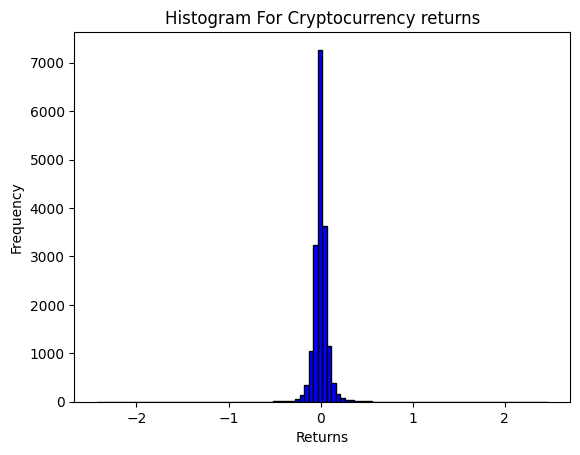

In [22]:
data=combined_returns
# Create a histogram
plt.hist(data, bins=100, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram For Cryptocurrency returns')

# Display the histogram
plt.show()

In [23]:
# Create a DataFrame
df = BTGm['Rmkt']

# Calculate basic descriptive statistics
total_unique_prices = len(df)
mean_return = df.mean()
trimmed_mean = trim_mean(df, proportiontocut=0.1)  # Adjust proportiontocut as needed
std_deviation = df.std()
min_return = df.min()
max_return = df.max()
skewness = skew(df)
excess_kurtosis = kurtosis(df, fisher=True)

# Create a summary DataFrame
summary = pd.DataFrame({
    'Total Unique Prices': [total_unique_prices],
    'Mean Return': [mean_return],
    "Trimmed mean 10%" : [trimmed_mean],
    'Standard Deviation': [std_deviation],
    'Minimum Return': [min_return],
    'Maximum Return': [max_return],
    'Skewness': [skewness],
    'Excess Kurtosis': [excess_kurtosis],
})

# Display the summary statistics
print("Table 2 Panel A reports the descriptive statistics of the daily price returns of the entire sample.")
print(summary)




Table 2 Panel A reports the descriptive statistics of the daily price returns of the entire sample.
   Total Unique Prices  Mean Return  Trimmed mean 10%  Standard Deviation  \
0                 1474    -0.000102          -0.00016            0.006332   

   Minimum Return  Maximum Return  Skewness  Excess Kurtosis  
0       -0.050786        0.048341       NaN              NaN  


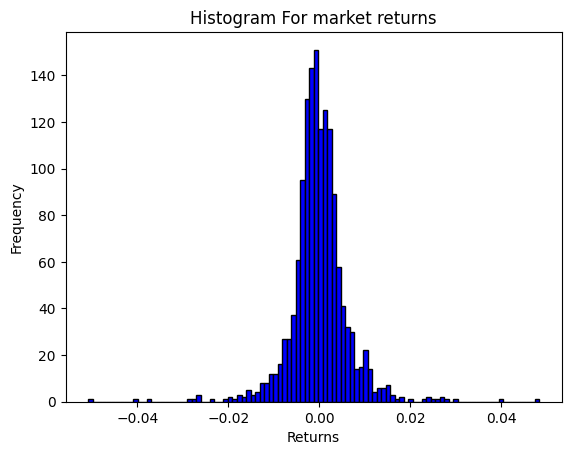

In [24]:
data=df
# Create a histogram
plt.hist(data, bins=100, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram For market returns')

# Display the histogram
plt.show()

#RESULTS

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import timedelta

def calculate_CAR(ref_date, data,robust=0,compounding=0):
    data=data.fillna(data.mean())
    if compounding ==0:
      redefine_returns(data)
    data1 = data[data.index <= ref_date-timedelta(days=1)] #data of the estimation window
    prices_BA=data1.iloc[-1,[0,17]] #return of the cryptocurrency an the market return corresponding the day preceding the attack
    X_new = data['Rmkt'].to_numpy()
    X=data1['Rmkt'].to_numpy()
    y=data1['returns'].to_numpy()
    if robust==1 :
      X = sm.add_constant(X)
      X_new = sm.add_constant(X_new) # Add constant term to new vector
      model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
      results = model.fit()
      # Predict the values of y for the new vector
      pred = results.predict(X_new)
      model=results
    elif robust==0:
      model = LinearRegression()
      X=X.reshape(-1,1)
      X_new=X_new.reshape(-1,1)
      model.fit(X, y)
      pred = model.predict(X_new)
      r_sq = model.score(X, y)
      print("R^2 = ",r_sq)
      print(f"intercept: {model.intercept_}")
      print(f"slope: {model.coef_}")
    else :

      X = sm.add_constant(X)
      X_new = sm.add_constant(X_new) # Add constant term to new vector
      model = sm.OLS(y, X, M=sm.robust.norms.HuberT())
      results = model.fit()
      # Predict the values of y for the new vector
      pred = results.predict(X_new)
      model=results

    data['prediction'] = pred
#the column prediction corresponds to the result of the linear regression function
#applied to the market returns throughout the entire selection window.
#Although it might appear that we don't need the abnormal returns for the esimation window,
#this results would be relevent in test calculation.

    # Calculate the abnormal returns (AR)
    data['AR'] = data['returns'] - data['prediction']
    data2=data[data.index >= ref_date-timedelta(days=1)]

    # Calculate the cumulative abnormal return (CAR)
    data2['CAR'] = data2['AR'].cumsum()

    if compounding == 1 :
      # Calculate the cumulative abnormal return (CAR)
      data2['CAR'] = np.exp(data2['CAR'])-1
      data2['AR'] = np.exp(data2['AR'])-1
      # Find the minimal CAR
    min_CAR = np.nanmin(data2['CAR'])




    CAR=data2.iloc[-1]['CAR']
    return CAR,min_CAR,data,data2,model,prices_BA

In [107]:
#imlepmenting the CAR calculation function and getting relevent information in the form of datasets
horizon = 11
All_CAR_dataset=pd.DataFrame() #this dataset contains resuts of CAR for all currencies on the event window
#                              starting from hrizon 0 (the day of the attack) to hoizon 10 (10 days after the atack)
All_crypto_data=pd.DataFrame() #this dataset containsg resuts of AR and other relevent information for all currencies
#                              on the entire selection window (estimation window + event window) starting from 80 days
#                              before the attack (the day of the attack) to hoizon 10 (10 days after the atack)

min_CAR_list=[]
CAR_list=[]
name_list=[]        #list of cryptocurrency names
attack_name_list=[] #list of attack names in the folowing format :
#                   Attack AttackRank on CryptocurrencyName (expl:Attack 1 on Bitcoin Gold )
price_variation_list=[]
CCMIX_variation_list=[]
attack_dates_list=[]
for c in crypto_sets:
  name=c[2]
  name_list.append(name)
  for attack_index in range(len(c[1])):
    attack_date=c[1][attack_index]
    dataset=c[0]
    print(attack_date)
    attack_date=pd.to_datetime(attack_date).tz_localize('UTC')
    start_date=attack_date-timedelta(days=80)
    end_date=attack_date+timedelta(days=horizon)
    dataset=dataset.loc[(dataset.index <= end_date) & (dataset.index >= start_date)]
    print(attack_date)
    CAR,min_CAR,dataset,data2,model,prices_BA=calculate_CAR(attack_date, dataset,3,1)
    price_variation_list.append(((data2.iloc[horizon,0])-prices_BA[0])/prices_BA[0]*100)
    CCMIX_variation_list.append(((data2.iloc[horizon,17])-prices_BA[1])/prices_BA[1]*100)
    attack_name='Attack '+str(attack_index+1)+' on '+name
    attack_name_list.append(attack_name)
    CAR_list.append(CAR)
    min_CAR_list.append(min_CAR)
    All_CAR_dataset=pd.concat([All_CAR_dataset,data2.reset_index()['CAR']],axis=1)
    All_CAR_dataset.rename(columns={'CAR': attack_name}, inplace=True)
    All_crypto_data=pd.concat([All_crypto_data,dataset.reset_index()[['returns','Rmkt','AR']]],axis=1)
    All_crypto_data.rename(columns={'returns': attack_name+' returns','Rmkt': attack_name+' Rmkt','AR':attack_name+' AR'}, inplace=True)
    attack_dates_list.append(attack_date)
All_CAR_dataset['Mean CAR']=All_CAR_dataset.mean(axis=1)
Attack_results=pd.DataFrame({"Name":attack_name_list,"Attack date":attack_dates_list,"Min_CAR":min_CAR_list,"CAR after "+str(horizon-1)+" days":CAR_list,"Price variation "+str(horizon-1)+" days after the attack (%)" :price_variation_list,"CCMIX variation "+str(horizon-1)+" days after the attack (%)" :CCMIX_variation_list})
#Attack_results is a dataframe that extends on the event window and contains CAR results and other relevent attack chracteristics

2018-05-16 22:37:54
2018-05-16 22:37:54+00:00
2020-01-23 18:01:32
2020-01-23 18:01:32+00:00
2019-01-06 12:00:00
2019-01-06 12:00:00+00:00
2018-04-04 12:00:00
2018-04-04 12:00:00+00:00
2019-01-04 03:27:11
2019-01-04 03:27:11+00:00
2020-07-31 16:36:07
2020-07-31 16:36:07+00:00
2020-08-06 02:54:27
2020-08-06 02:54:27+00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['M']
  warnings.warn(msg, ValueWarning)
<ipython-input-106-c0d97aed908a>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['CAR'] = data2['AR'].cumsum()
<ipython-input-106-c0d97aed908a>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['CAR'] = np.exp(data2['CAR'])-1
<ipython-input-106-c0d97aed908a>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

2020-08-29 00:00:00
2020-08-29 00:00:00+00:00
2019-07-29 12:00:00
2019-07-29 12:00:00+00:00
2021-01-19 17:24:20
2021-01-19 17:24:20+00:00
2018-06-03 00:26:00
2018-06-03 00:26:00+00:00
2018-10-11 12:00:00
2018-10-11 12:00:00+00:00
2018-05-30 12:00:00
2018-05-30 12:00:00+00:00
2019-06-04 12:00:00
2019-06-04 12:00:00+00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['M']
  warnings.warn(msg, ValueWarning)
<ipython-input-106-c0d97aed908a>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['CAR'] = data2['AR'].cumsum()
<ipython-input-106-c0d97aed908a>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['CAR'] = np.exp(data2['CAR'])-1
<ipython-input-106-c0d97aed908a>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

2018-04-08 12:00:00
2018-04-08 12:00:00+00:00
2018-05-15 12:00:00
2018-05-15 12:00:00+00:00
2018-09-08 12:00:00
2018-09-08 12:00:00+00:00
2018-04-04 06:00:00
2018-04-04 06:00:00+00:00
2018-05-22 00:37:00
2018-05-22 00:37:00+00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['M']
  warnings.warn(msg, ValueWarning)
<ipython-input-106-c0d97aed908a>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['CAR'] = data2['AR'].cumsum()
<ipython-input-106-c0d97aed908a>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['CAR'] = np.exp(data2['CAR'])-1
<ipython-input-106-c0d97aed908a>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [108]:
Attack_results

,Name,Attack date,Min_CAR,CAR after 10 days,Price variation 10 days after the attack (%),CCMIX variation 10 days after the attack (%)
0,Attack 1 on Bitoin Gold,2018-05-16 22:37:54+00:00,-0.169159,-0.163594,-24.113022,-23.463699
1,Attack 2 on Bitoin Gold,2020-01-23 18:01:32+00:00,-0.097309,0.060374,10.114641,12.881028
2,Attack 1 on Einshteinium,2019-01-06 12:00:00+00:00,-0.173427,-0.054523,-13.389116,-7.923866
3,Attack 1 on Electroneum,2018-04-04 12:00:00+00:00,-0.113834,0.420669,6.507514,8.262136
4,Attack 1 on Ethereum Classic,2019-01-04 03:27:11+00:00,-0.096400,-0.088738,-17.393772,-12.555994
5,Attack 2 on Ethereum Classic,2020-07-31 16:36:07+00:00,-0.121155,-0.121155,-7.972349,18.804177
6,Attack 3 on Ethereum Classic,2020-08-06 02:54:27+00:00,-0.070571,0.001500,1.954506,3.723623
7,Attack 4 on Ethereum Classic,2020-08-29 00:00:00+00:00,-0.202235,-0.196646,-21.617858,-7.223368
8,Attack 1 on Expance,2019-07-29 12:00:00+00:00,-0.281342,-0.281342,-36.518903,21.833397
9,Attack 1 on Zcoin(Firo),2021-01-19 17:24:20+00:00,-0.403720,-0.403720,-33.349364,-12.046012


In [109]:
All_crypto_data.drop(91,axis=0,inplace=True)

In [110]:
#verifying nan values
All_crypto_data.columns[All_crypto_data.isna().any()]

Index([], dtype='object')

In [111]:
#assambling individual attacks and merged attacks in the same dataset
#The merged attack related o a specific currency has the average impact of all attacks that this currency has been subject to.
for name in name_list :
  selected_columns = [col for col in All_CAR_dataset.columns if name in col]
  All_CAR_dataset[name+" merged attacks"]=All_CAR_dataset[selected_columns].mean(axis=1)

In [112]:
#defining a pot function for CAR figures
import matplotlib.pyplot as plt
def plot_CAR(attack_name='Bitoin Gold 1'):
  plt.figure(figsize=(6,6))
  CAR_dataset=All_CAR_dataset[attack_name]
  plt.plot(np.exp(CAR_dataset)-1,label='CAR')
  plt.xticks(rotation=45)
  plt.axvline(x=0, color ='red', linestyle='--')
  plt.axhline(y=0, color='black', linestyle='--')
  plt.title(attack_name)
  plt.xlabel('Horizon')
  plt.ylabel('Return')
  plt.legend()

#Tests

In [113]:
Mi=80 #size of the event window
N=19 #number of attacks

In [114]:
All_crypto_data['AAR']=All_crypto_data[[attack_name+' AR' for attack_name in attack_name_list]].mean(axis=1)

In [115]:
All_crypto_data['S_AAR']=(((All_crypto_data[[attack_name+' AR' for attack_name in attack_name_list]]-All_crypto_data['AAR'])**2).sum(axis=1)/(N-1)).apply(np.sqrt)

In [116]:
for attack_name in attack_name_list :
  AR=attack_name+' AR'
  Rmkt=attack_name+' Rmkt'
  Rmkt_=All_crypto_data[Rmkt].mean()
  S_ARi=np.sqrt((All_crypto_data.loc[:Mi-1,AR]**2).sum()/(Mi-2))
  All_crypto_data[attack_name+' adj_S_AR']=(S_ARi**2*(1+1/Mi+((All_crypto_data[Rmkt]-Rmkt_)**2)/(((All_crypto_data.loc[:Mi-1,Rmkt]-Rmkt_)**2).sum()))).apply(np.sqrt)
  All_crypto_data[attack_name+' S_AR']=S_ARi
  All_crypto_data[attack_name+' adj_S_CAR']=np.sqrt(S_ARi**2*((All_crypto_data.index-80)*(1+1/Mi)+((All_crypto_data.loc[Mi:,Rmkt]-Rmkt_)**2).sum()/(((All_crypto_data.loc[:Mi-1,Rmkt]-Rmkt_)**2).sum())))
  All_crypto_data[attack_name+' SAR']=All_crypto_data[attack_name+' AR']/All_crypto_data[attack_name+' S_AR']

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:969: RuntimeWarning: invalid val

In [117]:
All_crypto_data['ASAR']=All_crypto_data[[attack_name+' SAR' for attack_name in attack_name_list]].sum(axis=1)

In [118]:
All_crypto_data['S_ASAR']=((All_crypto_data[[attack_name+' SAR' for attack_name in attack_name_list]].sub(All_crypto_data[[attack_name+' SAR' for attack_name in attack_name_list]].mean(axis=1),axis=0)**2).sum(axis=1)/(N-1)).apply(np.sqrt)

In [119]:
All_crypto_data['S_SAR']=All_crypto_data['S_ASAR']

In [120]:
Event_Window_data=All_crypto_data.iloc[80:,:]

In [121]:
for attack_name in attack_name_list :
  AR=attack_name+' AR'
  adj_S_CAR=attack_name+' adj_S_CAR'
  S_CAR=attack_name+' S_CAR'
  CAR=attack_name+' CAR'
  S_AR=attack_name+' S_AR'
  SCAR=attack_name+' SCAR'
  Event_Window_data[CAR]=Event_Window_data[AR].cumsum()
  Event_Window_data[S_CAR]=Event_Window_data[S_AR]*np.sqrt(Event_Window_data.index-Mi+1)
  Event_Window_data[SCAR]=Event_Window_data[CAR]/Event_Window_data[adj_S_CAR]

<ipython-input-121-3d10027967bf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data[CAR]=Event_Window_data[AR].cumsum()
<ipython-input-121-3d10027967bf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data[S_CAR]=Event_Window_data[S_AR]*np.sqrt(Event_Window_data.index-Mi+1)
<ipython-input-121-3d10027967bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [122]:
Event_Window_data['S_SCAR']=((Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]]-Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].mean())**2/(N-1)).sum(axis=1).apply(np.sqrt)

<ipython-input-122-218ff3694ea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['S_SCAR']=((Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]]-Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].mean())**2/(N-1)).sum(axis=1).apply(np.sqrt)


In [123]:
Event_Window_data['SCAR_']=Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].mean(axis=1)

<ipython-input-123-391aa2976dc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['SCAR_']=Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].mean(axis=1)


In [124]:
Event_Window_data['S_SCAR_']=(((Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].sub(Event_Window_data['SCAR_'],axis=0))**2).sum(axis=1)/(N-1)).apply(np.sqrt)

<ipython-input-124-b7b33be4896d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['S_SCAR_']=(((Event_Window_data[[attack_name+' SCAR' for attack_name in attack_name_list]].sub(Event_Window_data['SCAR_'],axis=0))**2).sum(axis=1)/(N-1)).apply(np.sqrt)


In [125]:
Event_Window_data['BMP_test']=np.sqrt(N)*Event_Window_data['SCAR_']/Event_Window_data['S_SCAR_']

<ipython-input-125-a274103a2389>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['BMP_test']=np.sqrt(N)*Event_Window_data['SCAR_']/Event_Window_data['S_SCAR_']


In [126]:
Event_Window_data['ASAR']=np.sqrt(N)*Event_Window_data['SCAR_']/Event_Window_data['S_SCAR_']

<ipython-input-126-a5d51feb0930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['ASAR']=np.sqrt(N)*Event_Window_data['SCAR_']/Event_Window_data['S_SCAR_']


In [127]:
Event_Window_data.at[80,'BMP_test']=Event_Window_data.at[80,'ASAR']/Event_Window_data.at[80,'S_ASAR']/np.sqrt(N)

In [128]:
from scipy.stats import norm
Event_Window_data['p_BMP_test'] = (1 - norm.cdf(abs(Event_Window_data['BMP_test']))) * 2

<ipython-input-128-02ba2cb70df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['p_BMP_test'] = (1 - norm.cdf(abs(Event_Window_data['BMP_test']))) * 2


In [129]:
Event_Window_data['ACAR']=Event_Window_data[[attack_name+' CAR' for attack_name in attack_name_list]].mean(axis=1)

<ipython-input-129-c400b0b71051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data['ACAR']=Event_Window_data[[attack_name+' CAR' for attack_name in attack_name_list]].mean(axis=1)


In [130]:
Event_Window_data.columns[Event_Window_data.isna().any()]

Index([], dtype='object')

In [131]:
for h in Event_Window_data.index:
  U_h_=pd.Series([0]*(Mi+1))
  for attack_name in attack_name_list :
    CAR_element=Event_Window_data.at[h,attack_name+' SCAR']/Event_Window_data.at[h,'S_SCAR']
    CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
    CAR_ranks =CAR_series.rank()
    U_it=CAR_ranks/(Mi+2)-0.5
    U_h_=U_h_+U_it
    U_h_=U_h_/N
  print(U_h_.isna().sum())
  S_U_=np.sqrt((U_h_**2).mean())
  Z_h=U_h_[80]/S_U_
  Event_Window_data.at[h,'Grank_test']=Z_h*(Mi-1)/(Mi-Z_h**2)

<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_

0
0
0
0


<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_

0
0
0
0


<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_

0
0
0


<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-131-9cd6321a49ea>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CAR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))


In [132]:
U_0_=pd.Series([0]*(Mi+1))
for attack_name in attack_name_list :
  AR_element=Event_Window_data.at[80,attack_name+' SAR']/Event_Window_data.at[80,'S_SAR']
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
  AR_ranks =CAR_series.rank()
  U_it=AR_ranks/(Mi+2)-0.5
  U_0_=U_0_+U_it
  U_0_=U_0_/N
print(U_0_.isna().sum())
S_U_=np.sqrt((U_0_**2).mean())
Z_0=U_0_[80]/S_U_
Event_Window_data.at[0,'Grank_test']=Z_0*(Mi-1)/(Mi-Z_0**2)

<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_cryp

0


<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AR_series=All_crypto_data.loc[:79,attack_name+' SAR'].append(pd.Series([CAR_element],index=[Mi]))
<ipython-input-132-d7a7dd879ca5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Event_Window_data.at[0,'Grank_test']=Z_0*(Mi-1)/(Mi-Z_0**2)


In [133]:
from scipy.stats import t
Event_Window_data['p_Grank_test'] = (1 - t.cdf(abs(Event_Window_data['Grank_test']),Mi-1)) * 2

In [134]:
Event_Window_data['p_Grank_test']

80    0.098313
81    0.305625
82    0.121204
83    0.156233
84    0.122914
85    0.102239
86    0.122820
87    0.133523
88    0.170219
89    0.157631
90    0.327366
0     0.287345
Name: p_Grank_test, dtype: float64

In [135]:
p=proportions_positifs=(All_crypto_data.loc[:79,[attack_name+' AR' for attack_name in attack_name_list]] > 0).mean().mean()
for h in Event_Window_data.index :
  CAR_ih_positifs = (Event_Window_data.loc[h,[attack_name+' CAR' for attack_name in attack_name_list]] > 0).sum()
  Event_Window_data.at[h,'GSign_test']=CAR_ih_positifs-N*p/np.sqrt(N*p*(1-p))

AR_i0_positifs = (Event_Window_data.loc[80,[attack_name+' AR' for attack_name in attack_name_list]] > 0).sum()
Event_Window_data.at[80,'GSign_test']=AR_i0_positifs-N*p/np.sqrt(N*p*(1-p))

In [136]:
Event_Window_data['p_GSign_test'] = (1 - norm.cdf(abs(Event_Window_data['GSign_test']))) * 2

In [137]:
Event_Window_data['p_GSign_test']

80    0.000170
81    0.000002
82    0.000002
83    0.000002
84    0.005781
85    0.005781
86    0.000170
87    0.005781
88    0.005781
89    0.005781
90    0.078420
0     0.000022
Name: p_GSign_test, dtype: float64

In [138]:
final_result_data=Event_Window_data.loc[:,['ACAR','p_BMP_test','p_Grank_test','p_GSign_test']].drop(0)
#final_result_data['ACAR']=np.exp(final_result_data['ACAR'])-1

In [139]:
final_result_data

,ACAR,p_BMP_test,p_Grank_test,p_GSign_test
80,-0.022792,0.606458,0.098313,0.000170
81,-0.025345,0.155926,0.305625,0.000002
82,-0.010856,0.414862,0.121204,0.000002
83,-0.004486,0.567825,0.156233,0.000002
84,-0.011683,0.252984,0.122914,0.005781
85,-0.030034,0.146587,0.102239,0.005781
86,-0.040182,0.137903,0.122820,0.000170
87,-0.029783,0.162191,0.133523,0.005781
88,-0.048770,0.108988,0.170219,0.005781
89,-0.031345,0.176196,0.157631,0.005781


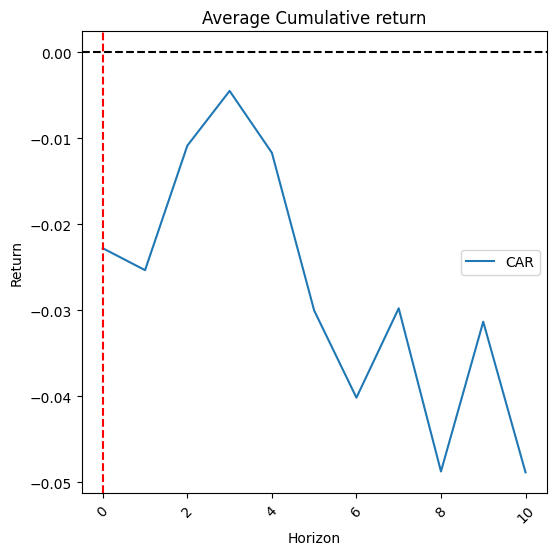

In [140]:
plt.figure(figsize=(6,6))
CAR_dataset=final_result_data['ACAR']
CAR_dataset.index=CAR_dataset.index-80
plt.plot(CAR_dataset,label='CAR')
plt.xticks(rotation=45)
plt.axvline(x=0, color='red', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Average Cumulative return")
plt.xlabel('Horizon')
plt.ylabel('Return')
plt.legend()

#Tests on individual cryptos

In [141]:
for h in Event_Window_data.index:
  for attack_name in attack_name_list :
    test=Event_Window_data.at[h,attack_name+' t_test']=Event_Window_data.at[h,attack_name+' CAR']/Event_Window_data.at[h,attack_name+' S_CAR']
    Event_Window_data.at[h,attack_name+' p_t_test']=(1-t.cdf(abs(test),Mi-2)) *2

In [142]:
["table of the cumulative abnormal return for "+attack_name+ " and the p value of its significance t-test" for attack_name in attack_name_list]

['table of the cumulative abnormal return for Attack 1 on Bitoin Gold and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 2 on Bitoin Gold and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 1 on Einshteinium and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 1 on Electroneum and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 1 on Ethereum Classic and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 2 on Ethereum Classic and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 3 on Ethereum Classic and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 4 on Ethereum Classic and the p value of its significance t-test',
 'table of the cumulative abnormal return for Attack 1 on E

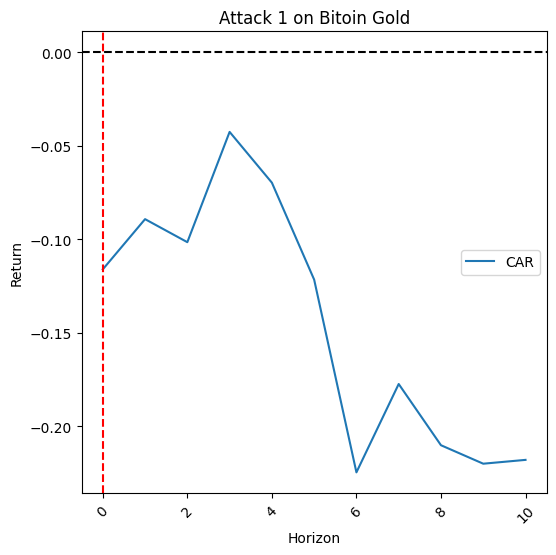

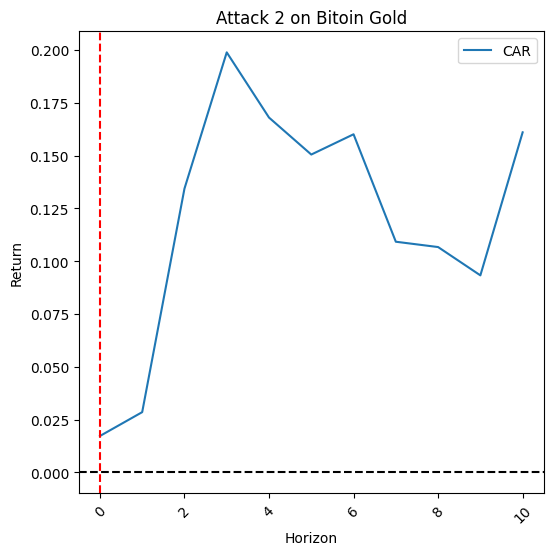

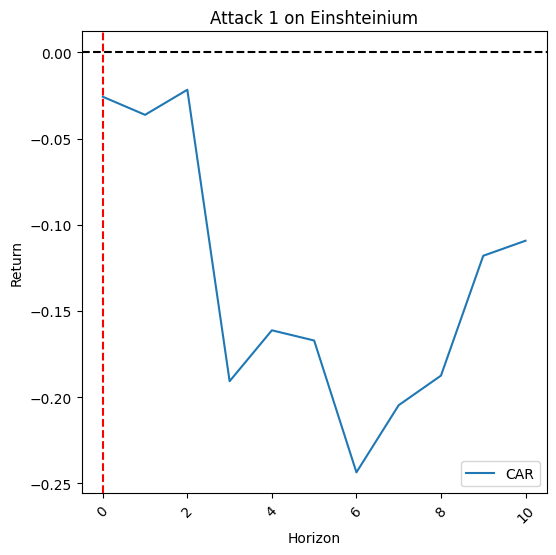

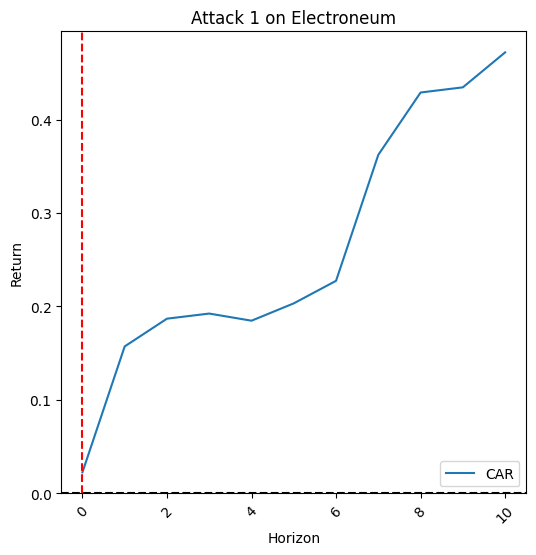

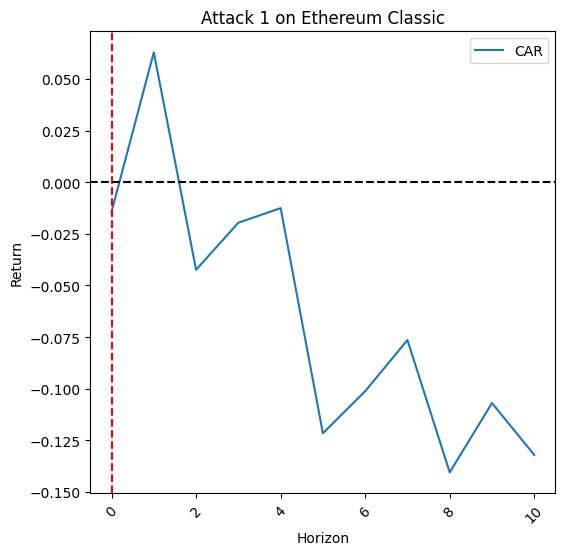

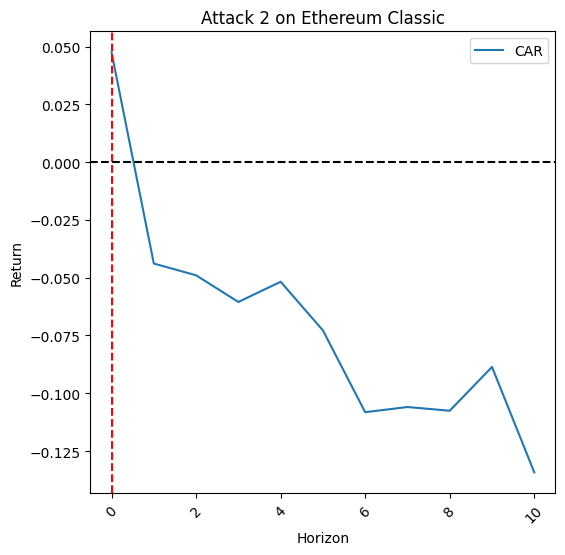

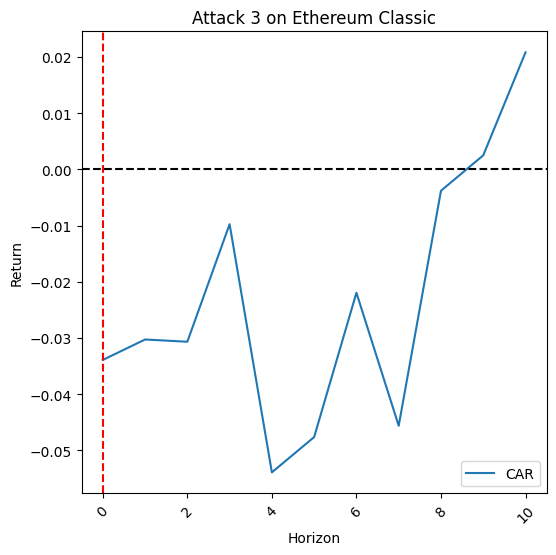

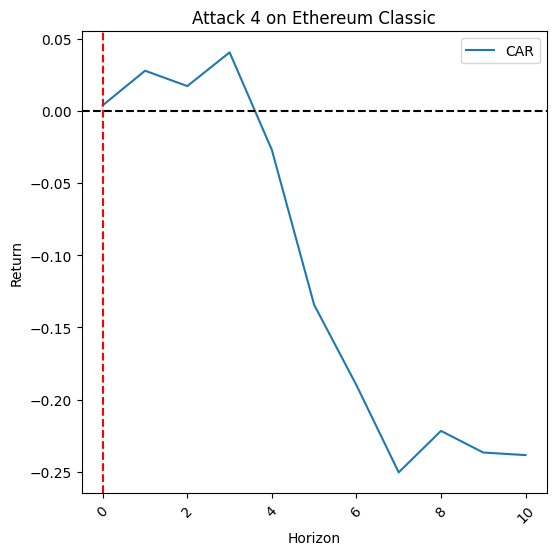

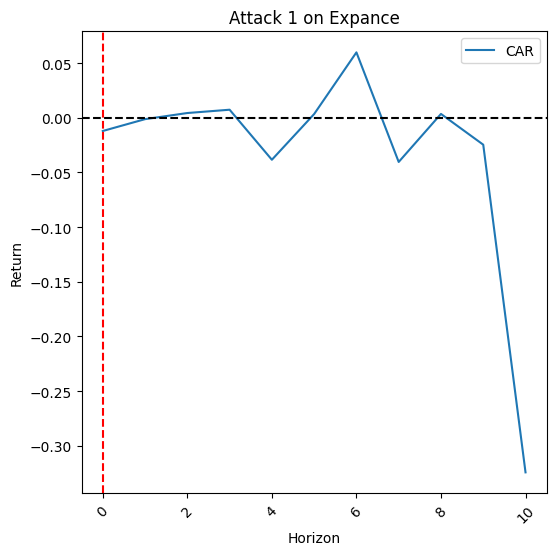

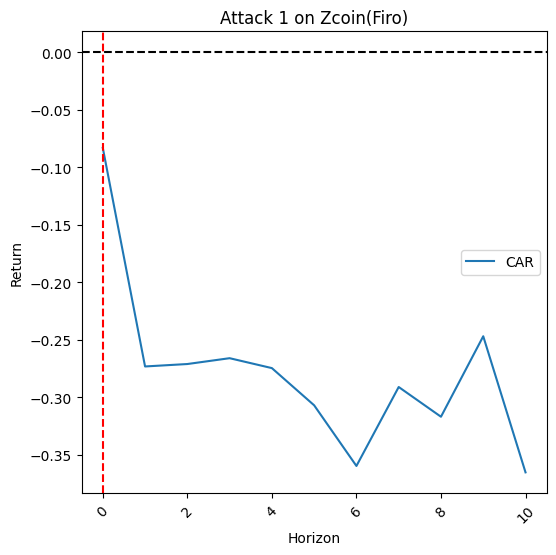

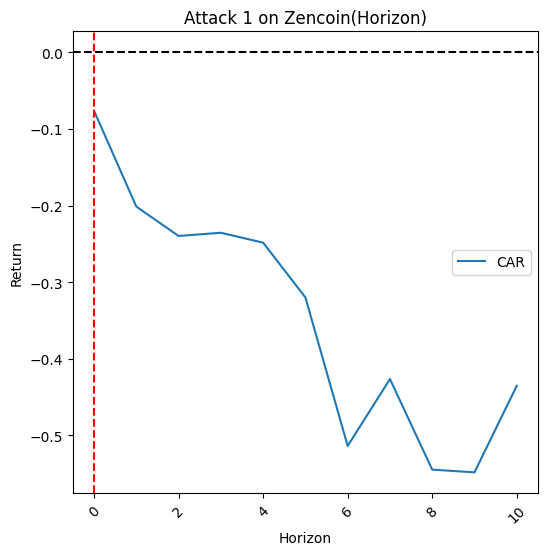

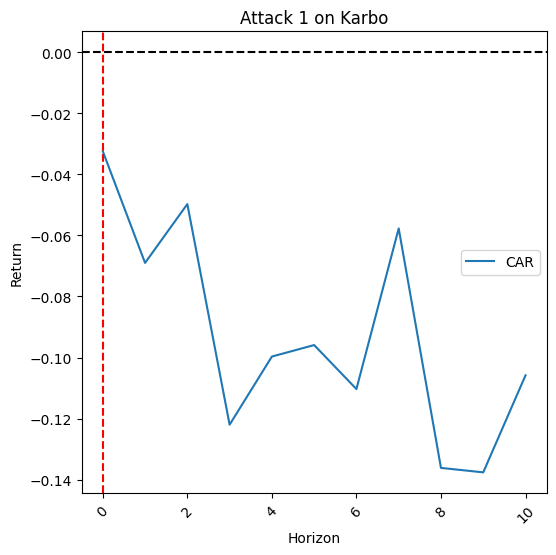

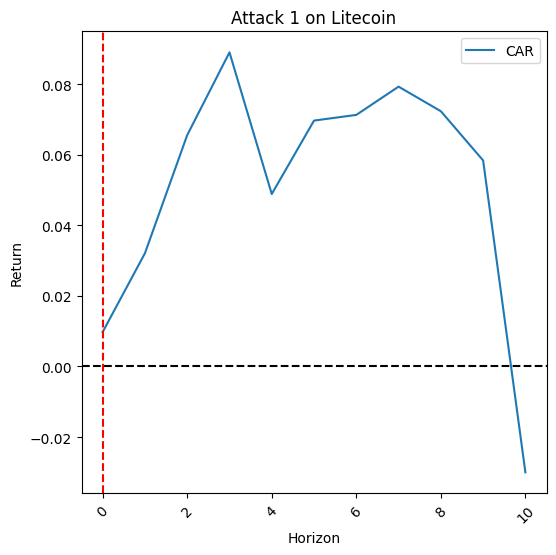

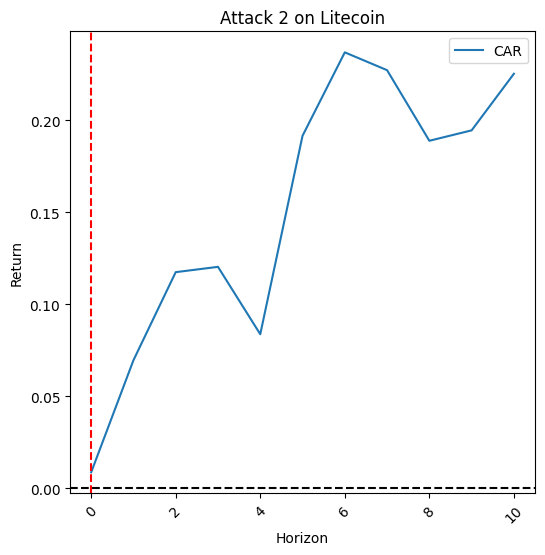

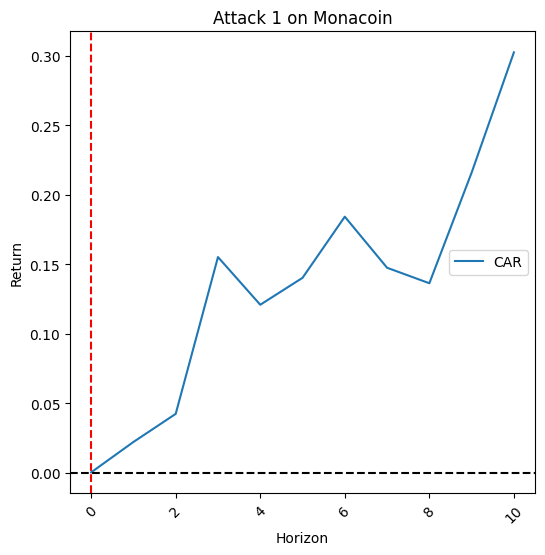

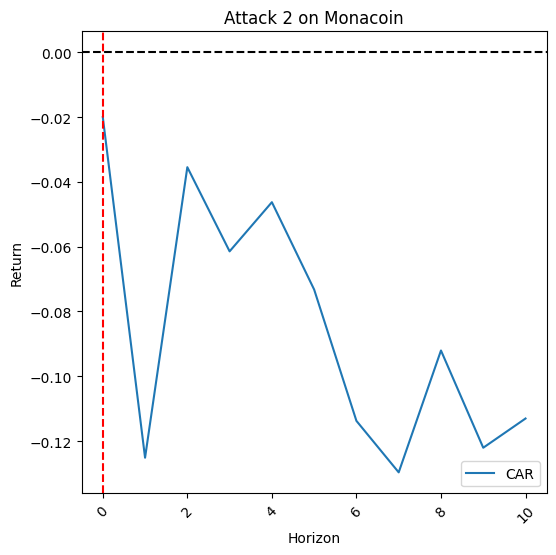

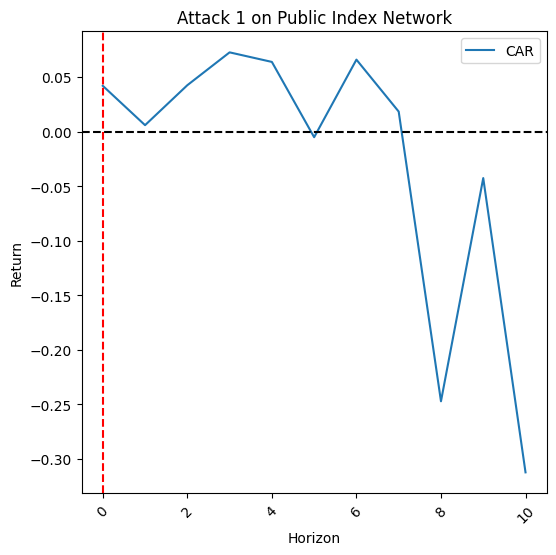

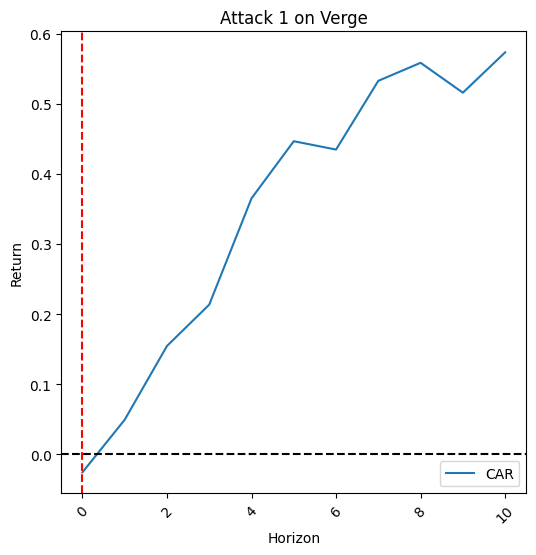

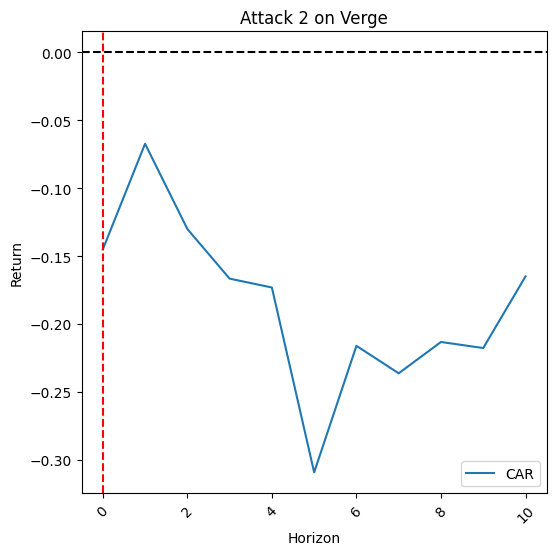

In [143]:
for attack_name in attack_name_list :
  dat=Event_Window_data[attack_name+' CAR'].drop(0)
#  dat=np.exp(dat)-1
  dat.index=dat.index-80
  plt.figure(figsize=(6,6))
  plt.plot(dat,label='CAR')
  plt.xticks(rotation=45)
  plt.axvline(x=0, color ='red', linestyle='--')
  plt.axhline(y=0, color='black', linestyle='--')
  plt.title(attack_name)
  plt.xlabel('Horizon')
  plt.ylabel('Return')
  plt.legend()

In [144]:
for attack_name in attack_name_list :
  dat=Event_Window_data[[attack_name+' CAR',attack_name+' p_t_test']].drop(0)
  dat[attack_name+' CAR']=np.exp(dat[attack_name+' CAR'])-1
  print(dat)

    Attack 1 on Bitoin Gold CAR  Attack 1 on Bitoin Gold p_t_test
80                    -0.109558                          0.083639
81                    -0.085325                          0.343846
82                    -0.096520                          0.378878
83                    -0.041640                          0.748952
84                    -0.067311                          0.639225
85                    -0.114434                          0.455957
86                    -0.201154                          0.203665
87                    -0.162506                          0.346626
88                    -0.189482                          0.293530
89                    -0.197447                          0.296763
90                    -0.195803                          0.324153
    Attack 2 on Bitoin Gold CAR  Attack 2 on Bitoin Gold p_t_test
80                     0.017363                          0.850656
81                     0.028921                          0.825487
82        

In [145]:
Event_Window_data[[attack_name+' p_t_test' for attack_name in attack_name_list]+[attack_name+' CAR' for attack_name in attack_name_list]].drop(0)

,Attack 1 on Bitoin Gold p_t_test,Attack 2 on Bitoin Gold p_t_test,Attack 1 on Einshteinium p_t_test,Attack 1 on Electroneum p_t_test,Attack 1 on Ethereum Classic p_t_test,Attack 2 on Ethereum Classic p_t_test,Attack 3 on Ethereum Classic p_t_test,Attack 4 on Ethereum Classic p_t_test,Attack 1 on Expance p_t_test,Attack 1 on Zcoin(Firo) p_t_test,...,Attack 1 on Zcoin(Firo) CAR,Attack 1 on Zencoin(Horizon) CAR,Attack 1 on Karbo CAR,Attack 1 on Litecoin CAR,Attack 2 on Litecoin CAR,Attack 1 on Monacoin CAR,Attack 2 on Monacoin CAR,Attack 1 on Public Index Network CAR,Attack 1 on Verge CAR,Attack 2 on Verge CAR
80,0.083639,0.850656,0.686886,0.833770,0.812909,0.105806,0.275343,0.899860,0.874550,0.274023,...,-0.083109,-0.076335,-0.032392,0.009764,0.008761,0.000285,-0.019989,0.041876,-0.025565,-0.145147
81,0.343846,0.825487,0.688346,0.296477,0.463229,0.288692,0.490009,0.522336,0.991075,0.012344,...,-0.273318,-0.201393,-0.068993,0.032088,0.069638,0.022149,-0.125150,0.005823,0.049434,-0.067282
82,0.378878,0.397303,0.844528,0.310628,0.685758,0.333444,0.567818,0.746980,0.973418,0.041244,...,-0.271200,-0.239787,-0.049719,0.065563,0.117499,0.042375,-0.035453,0.042434,0.154584,-0.130029
83,0.748952,0.278578,0.138010,0.365790,0.871077,0.300859,0.874728,0.509584,0.961154,0.081696,...,-0.266123,-0.235591,-0.122012,0.089006,0.120387,0.155190,-0.061438,0.072524,0.213577,-0.166587
84,0.639225,0.412208,0.260724,0.436990,0.926003,0.427966,0.437167,0.692533,0.821960,0.107418,...,-0.274751,-0.248525,-0.099679,0.048866,0.083791,0.120869,-0.046259,0.063763,0.365055,-0.173118
85,0.455957,0.502217,0.286942,0.434853,0.412868,0.309396,0.530608,0.076422,0.985171,0.100545,...,-0.307120,-0.320043,-0.095916,0.069676,0.191561,0.140238,-0.073238,-0.005220,0.446545,-0.309221
86,0.203665,0.508694,0.151941,0.418647,0.527600,0.163052,0.788737,0.021282,0.766482,0.075242,...,-0.359900,-0.513995,-0.110330,0.071285,0.236879,0.184237,-0.113776,0.065864,0.434648,-0.216072
87,0.346626,0.672971,0.259043,0.229178,0.655203,0.200898,0.602802,0.004880,0.851461,0.176292,...,-0.291196,-0.426607,-0.057698,0.079293,0.227202,0.147493,-0.129674,0.018251,0.532678,-0.236283
88,0.293530,0.697445,0.329096,0.179963,0.439607,0.220664,0.967238,0.017916,0.987497,0.165208,...,-0.317070,-0.544892,-0.136169,0.072328,0.188860,0.136337,-0.092049,-0.247134,0.558333,-0.213232
89,0.296763,0.747038,0.559381,0.197377,0.576419,0.337560,0.979791,0.016546,0.918806,0.303653,...,-0.247035,-0.548491,-0.137630,0.058382,0.194512,0.215917,-0.122072,-0.042670,0.515721,-0.217689
